# **Practical assignment for Topic 6**

Our imports.

In [1]:
# Do not modify this code

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

Our dataset.

In [2]:
# Do not modify this code

np.random.seed(42)
n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(n, 1)

Create KNN model.

In [3]:
knn = KNeighborsRegressor(n_neighbors=10)
#knn = KNeighborsRegressor(n_neighbors=10, weights='distance') # try weighted version as well
knn.fit(X, y)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Plot the model.

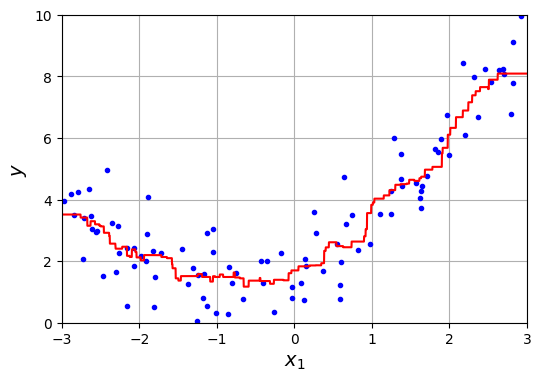

In [4]:
# Do not modify this code

X_plot = np.linspace(-3, 3, 5000).reshape(5000, 1)
yHat = knn.predict(X_plot)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_plot, yHat, "r-")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Evaluate the model using Cross-Validation.

In [5]:
# Do not modify this code

yHat = cross_val_predict(knn, X, y, cv=10)

print('MAE: ', mean_absolute_error(y, yHat))
print('MSE: ', mean_squared_error(y, yHat))
print('RMSE:', root_mean_squared_error(y, yHat))
print('R2:  ', r2_score(y, yHat))

MAE:  0.7811714259928344
MSE:  0.98228031311966
RMSE: 0.9911005565126376
R2:   0.8135860851695909


## **Task 1**

Create your own implementation of KNN which should output the same predictions for any k as the one implemented in scikit-learn library. Implement both, distance-weighted and unweighted KNN. The function should work correctly for any number of features, training set sizes, and query list set sizes.

*In the code of `predict()` you are allowed to use only the **numpy** library, i.e., you are **not allowed** to use **scikit-learn**.*

*You are **not allowed** to modify any given code in this class. You may only add additional code to the `predict()` function.*

In [6]:
# import BaseEstimator for inheritance
from sklearn.base import BaseEstimator

# define our new class for KNN
class KNN(BaseEstimator):
  # initialization function for setting KNN parameters
  def __init__(self, k=10, weighted=False):
    self.k = k
    self.weighted = weighted

  # function for "fitting" our model. no actual fitting is done because this is KNN
  def fit(self, X, y):
    self.X = X
    self.y = y

  # function for prediction where the actual work is happening
  def predict(self, Xq):
    # the number of query data points
    n = len(Xq)
    # the array which we will fill with predicted values
    yHat = np.zeros(n)
    if not hasattr(self, 'X') or not hasattr(self, 'y'):
      raise ValueError('The model must be fitted before calling predict.')
    X_train = np.asarray(self.X)
    if X_train.ndim == 1:
      X_train = X_train.reshape(-1, 1)
    y_train = np.asarray(self.y)
    if X_train.shape[0] == 0:
      raise ValueError('Training data is empty.')
    if self.k < 1:
      raise ValueError('k must be at least 1.')
    k = min(self.k, X_train.shape[0])
    yHat = yHat.astype(float, copy=False)

    # loop through all query points. q is query index
    for q in range(0, n):
      # one current query point for which we will do prediction
      xquery = Xq[q, :]
      xquery = np.asarray(xquery)

      # compute distances from the query point to all training data points
      #TODO
      distances = np.linalg.norm(X_train - xquery, axis=1)

      # find k nearest neighbors using the computed distances
      #TODO
      neighbor_idx = np.argsort(distances)[:k]
      neighbor_distances = distances[neighbor_idx]
      neighbor_targets = y_train[neighbor_idx]
      neighbor_targets = np.asarray(neighbor_targets)
      if neighbor_targets.ndim > 1:
        neighbor_targets = neighbor_targets.reshape(neighbor_targets.shape[0], -1)
        if neighbor_targets.shape[1] != 1:
          raise ValueError('Only single-output targets are supported.')
        neighbor_targets = neighbor_targets[:, 0]

      # compute weighted or unweighted prediction and store it in the yHat array
      if self.weighted:
        #TODO
        zero_distance_mask = neighbor_distances == 0
        if np.any(zero_distance_mask):
          yHat[q] = np.mean(neighbor_targets[zero_distance_mask])
        else:
          weights = 1.0 / neighbor_distances
          weights = weights / np.sum(weights)
          yHat[q] = np.dot(weights, neighbor_targets)
      else:
        #TODO
        yHat[q] = np.mean(neighbor_targets)

    # return the array of predictions
    return yHat

Create a KNN model using the newly implemented class.

In [7]:
my_knn = KNN(k=10)
#my_knn = KNN(k=10, weighted=True) # try weighted version as well
my_knn.fit(X, y)

Plot it.

*Note that the plot should be exactly the same as that what you got when you used the scikit-learn function `KNeighborsRegressor`. Compare the plots and, if they are not the same, correct your code.*

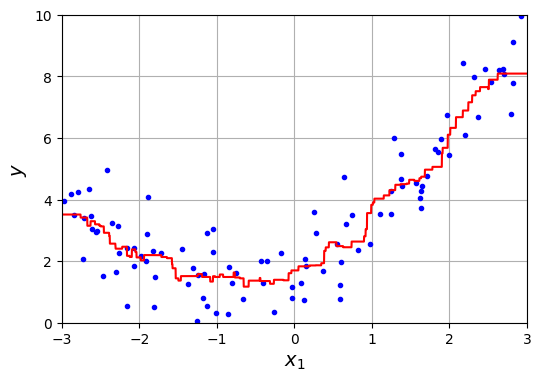

In [8]:
# Do not modify this code

X_plot = np.linspace(-3, 3, 5000).reshape(5000, 1)
yHat = my_knn.predict(X_plot)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_plot, yHat, "r-")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Evaluate it.

*Note that the evaluation result should be exactly the same as that what you got when you used the scikit-learn function `KNeighborsRegressor`. Compare the results and, if they are not the same, correct your code.*

In [9]:
# Do not modify this code

yHat = cross_val_predict(my_knn, X, y, cv=10)

print('MAE: ', mean_absolute_error(y, yHat))
print('MSE: ', mean_squared_error(y, yHat))
print('RMSE:', root_mean_squared_error(y, yHat))
print('R2:  ', r2_score(y, yHat))

MAE:  0.7811714259928344
MSE:  0.98228031311966
RMSE: 0.9911005565126376
R2:   0.8135860851695909


## **Task 2**

Use the `KNeighborsRegressor` class to try KNN with k values from 1 to 20. Compute and print training MSE and 10-fold cross-validated MSE values for each k. Cross-validation should be done using `cross_val_predict()`. Draw a plot with two curves analogous to the plot shown in **slide 16 on the right** from today's lecture. Add a legend so that it is clear which curve is which.

k= 1 | Training MSE: 0.000000 | 10-fold CV MSE: 1.496620
k= 2 | Training MSE: 0.363470 | 10-fold CV MSE: 1.248763
k= 3 | Training MSE: 0.527842 | 10-fold CV MSE: 1.097379
k= 4 | Training MSE: 0.605808 | 10-fold CV MSE: 1.103620
k= 5 | Training MSE: 0.667057 | 10-fold CV MSE: 1.047248
k= 6 | Training MSE: 0.705981 | 10-fold CV MSE: 1.014600
k= 7 | Training MSE: 0.716084 | 10-fold CV MSE: 1.009010
k= 8 | Training MSE: 0.732351 | 10-fold CV MSE: 1.012376
k= 9 | Training MSE: 0.788338 | 10-fold CV MSE: 1.002454
k=10 | Training MSE: 0.782875 | 10-fold CV MSE: 0.982280
k=11 | Training MSE: 0.799818 | 10-fold CV MSE: 0.989448
k=12 | Training MSE: 0.804988 | 10-fold CV MSE: 0.948270
k=13 | Training MSE: 0.807255 | 10-fold CV MSE: 0.921370
k=14 | Training MSE: 0.798680 | 10-fold CV MSE: 0.946457
k=15 | Training MSE: 0.798793 | 10-fold CV MSE: 0.961984
k=16 | Training MSE: 0.804534 | 10-fold CV MSE: 0.964857
k=17 | Training MSE: 0.828625 | 10-fold CV MSE: 0.997360
k=18 | Training MSE: 0.831490 |

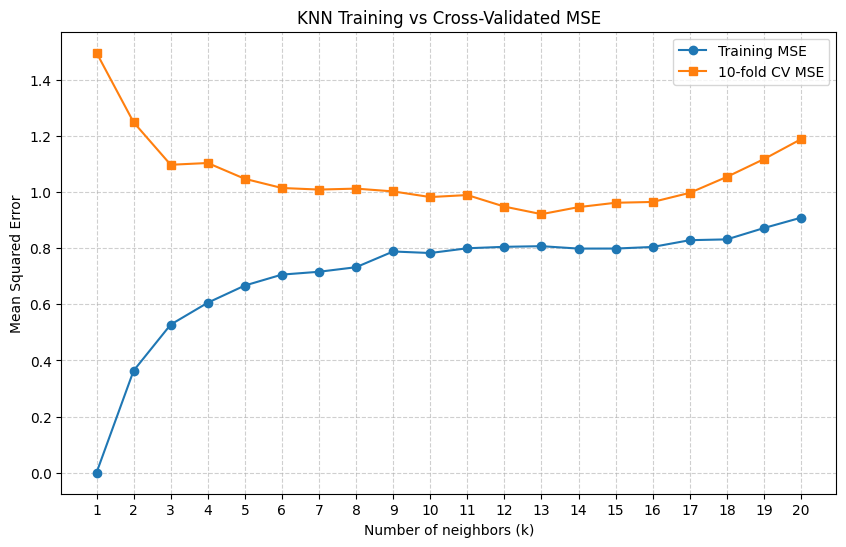

In [11]:
# Your code goes here
k_values = list(range(1, 21))
train_mse = []
cv_mse = []

for k in k_values:
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X, y)
  y_train_pred = knn.predict(X)
  train_error = mean_squared_error(y, y_train_pred)
  train_mse.append(train_error)

  cv_predictions = cross_val_predict(KNeighborsRegressor(n_neighbors=k), X, y, cv=10)
  cv_error = mean_squared_error(y, cv_predictions)
  cv_mse.append(cv_error)

  print(f"k={k:2d} | Training MSE: {train_error:.6f} | 10-fold CV MSE: {cv_error:.6f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_mse, marker='o', label='Training MSE')
plt.plot(k_values, cv_mse, marker='s', label='10-fold CV MSE')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('KNN Training vs Cross-Validated MSE')
plt.xticks(k_values)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



## **Task 3**
Explain the plot from Task 2. What exactly do we see in it and what conclusions can we make from it?

As k increases from 1 to 9, training error rises moderately ; in the meantime, CV MSE drops and reaches its lowest level at 13. From k = 14, the two curves climb together,, which means there is underfitting and the model is not working well anymore (it becomes too smooth and loses predictive power on training AND validations sets). The best k for this particular dataset is probably 13 as validation error is at its lowest and training error is rather low as well.

Let's keep in mind that the gap between the curves, refusing to reduces, illustrates how training performance alone can be misleading. Cross-validation identifies the neighbor counts that generalize best.

---
**After the tasks are done, submit this file. Do not clear it's output - all print-outs and diagrams should be left in the file.**